In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import geopandas as gpd

In [132]:
df_path = 'dataset/state_media_on_social_media_platforms.xlsx'
# loading the dataset
df = pd.read_excel(df_path)
# Load JSON data from file
with open('assets/recognized_countries.json', 'r') as file:
    data = json.load(file)
recognized_countries = data['recognized_countries']

with open('assets/equivalent_countries.json', 'r') as file:
    data = json.load(file)
equivalent_countries_dict = data

with open('equivalent.json', 'r') as file:
    data = json.load(file)
country_equivalent = data

In [75]:
def find_country_name_list(recognized_countries, country, my_dictionary):
    if country not in recognized_countries:
        return my_dictionary[country]
    else:
        return [country]

In [85]:
all_list = []
found_country_name_list = []
for region in list(df['Region of Focus'].values):
   temp_country_list = find_country_name_list(recognized_countries, region, equivalent_countries_dict)
   all_list.append(temp_country_list)
   for country_name in temp_country_list:
      if country_name not in found_country_name_list:
         found_country_name_list.append(country_name)
df['focus group'] = all_list

In [92]:
temp_dic = dict.fromkeys(found_country_name_list, 0)
for idx in range(len(df)):
    country_list = df['focus group'][idx]
    for country in country_list:
        temp_dic[country] += 1

In [137]:
temp_dic

{'Australia': 239,
 'Canada': 254,
 'New Zealand': 237,
 'United Kingdom': 246,
 'United States': 258,
 'Ireland': 244,
 'China': 114,
 'Afghanistan': 4,
 'Switzerland': 19,
 'Austria': 12,
 'Indonesia': 5,
 'United Arab Emirates': 11,
 'Belgium': 25,
 'Bulgaria': 10,
 'Croatia': 9,
 'Cyprus': 9,
 'Czech Republic': 9,
 'Denmark': 9,
 'Estonia': 9,
 'Finland': 9,
 'France': 28,
 'Germany': 16,
 'Greece': 11,
 'Hungary': 9,
 'Italy': 11,
 'Latvia': 9,
 'Lithuania': 10,
 'Luxembourg': 8,
 'Malta': 10,
 'Netherlands': 13,
 'Poland': 11,
 'Portugal': 11,
 'Romania': 9,
 'Slovakia': 9,
 'Slovenia': 9,
 'Spain': 24,
 'Sweden': 8,
 'Nigeria': 9,
 'Egypt': 20,
 'South Africa': 11,
 'Algeria': 19,
 'Morocco': 16,
 'Lesotho': 2,
 'Iran': 13,
 'Serbia': 2,
 'Saudi Arabia': 12,
 'Burundi': 2,
 'Cameroon': 1,
 'Congo': 2,
 'Chad': 1,
 'Trinidad and Tobago': 2,
 'Japan': 20,
 'Suriname': 2,
 'South Korea': 7,
 'Pakistan': 12,
 'Qatar': 10,
 'Bahrain': 10,
 'Iraq': 10,
 'Jordan': 10,
 'Kuwait': 10,
 '

In [134]:
new_dic = {}
for key in list(temp_dic.keys()):
    new_key = country_dictionary[key]
    new_dic[new_key] = temp_dic[key]
new_dic

{'Australia': 239,
 'Canada': 254,
 'New Zealand': 237,
 'United Kingdom': 246,
 'United States of America': 258,
 'Ireland': 244,
 'China': 114,
 'Afghanistan': 4,
 'Switzerland': 19,
 'Austria': 12,
 'Indonesia': 5,
 'United Arab Emirates': 11,
 'Belgium': 25,
 'Bulgaria': 10,
 'Croatia': 9,
 'Cyprus': 9,
 'Czechia': 9,
 'Denmark': 9,
 'Estonia': 9,
 'Finland': 9,
 'France': 28,
 'Germany': 16,
 'Greece': 11,
 'Hungary': 9,
 'Italy': 11,
 'Latvia': 9,
 'Lithuania': 10,
 'Luxembourg': 8,
 'Malta': 10,
 'Netherlands': 13,
 'Poland': 11,
 'Portugal': 11,
 'Romania': 9,
 'Slovakia': 9,
 'Slovenia': 9,
 'Spain': 24,
 'Sweden': 8,
 'Nigeria': 9,
 'Egypt': 20,
 'South Africa': 11,
 'Algeria': 19,
 'Morocco': 16,
 'Lesotho': 2,
 'Iran': 13,
 'Serbia': 2,
 'Saudi Arabia': 12,
 'Burundi': 2,
 'Cameroon': 1,
 'Democratic Rep. Congo': 2,
 'Chad': 1,
 'Trinidad and Tobago': 2,
 'Japan': 20,
 'Suriname': 2,
 'South Korea': 7,
 'Pakistan': 12,
 'Qatar': 10,
 'Bahrain': 10,
 'Iraq': 10,
 'Jordan': 1

In [138]:
with open('temp3.json', 'w') as json_file:
    json.dump(new_dic, json_file)

In [127]:
with open('temp.json', 'w') as json_file:
    json.dump(temp_dic, json_file)

In [130]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
with open('temp.txt', 'w') as file:
    file.write(str(list(world['name'])))

/tmp/ipykernel_644997/799337907.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [131]:
with open('temp2.txt', 'w') as file:
    file.write(str(list(temp_dic.keys())))

In [118]:
len(list(world['name']))

177

In [129]:
len(temp_dic)

146

In [119]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [126]:
with open('temp.txt', 'w') as file:
    file.write(str(temp_dic))

28


/tmp/ipykernel_644997/2636661238.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


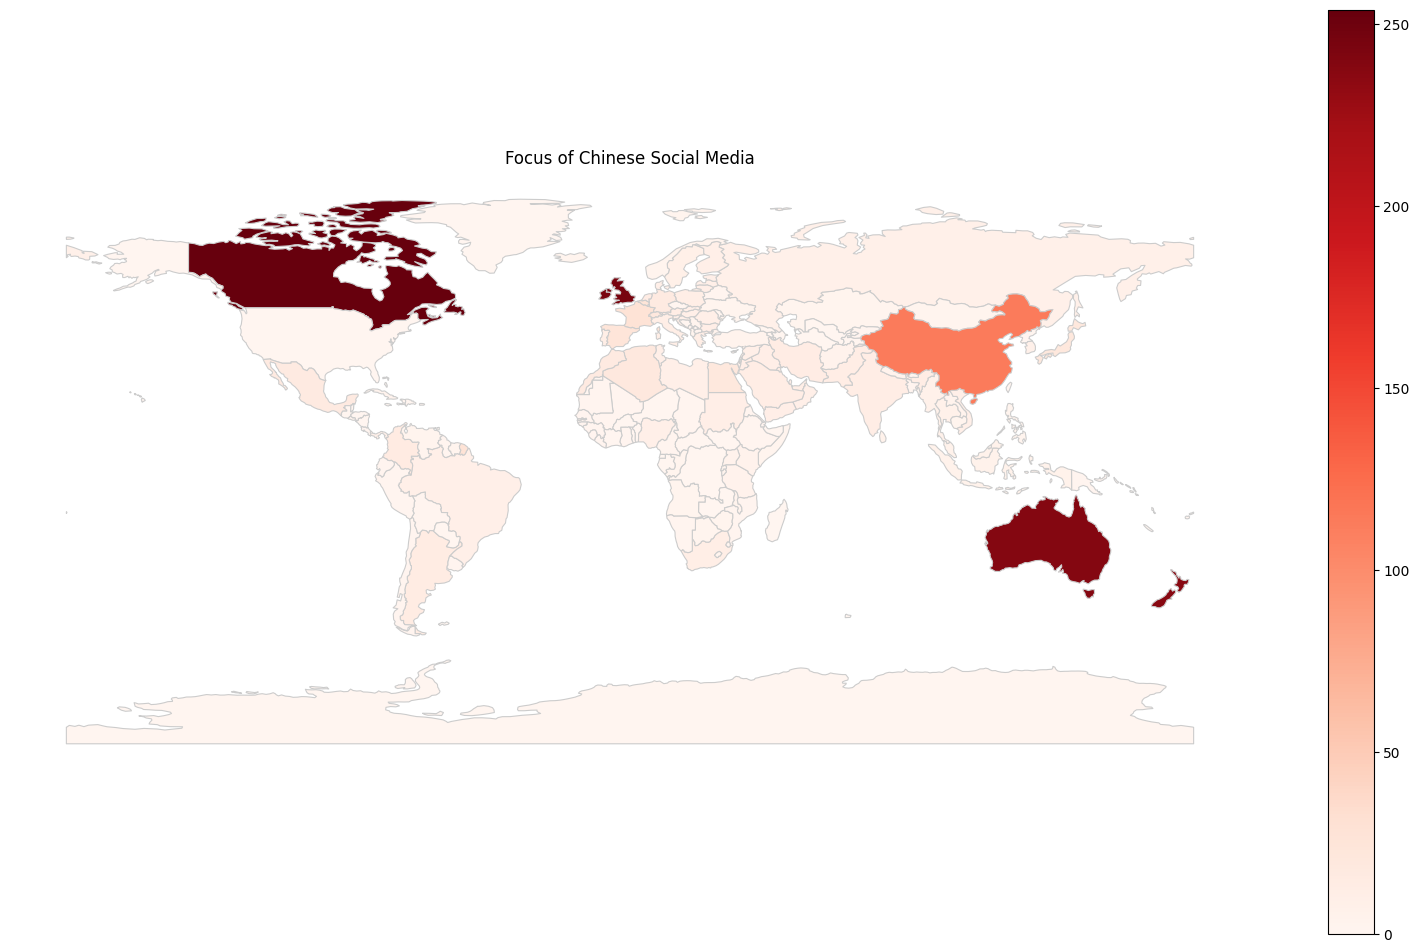

In [136]:
map_countries_occurrences(temp_dic)

29


/tmp/ipykernel_644997/2636661238.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


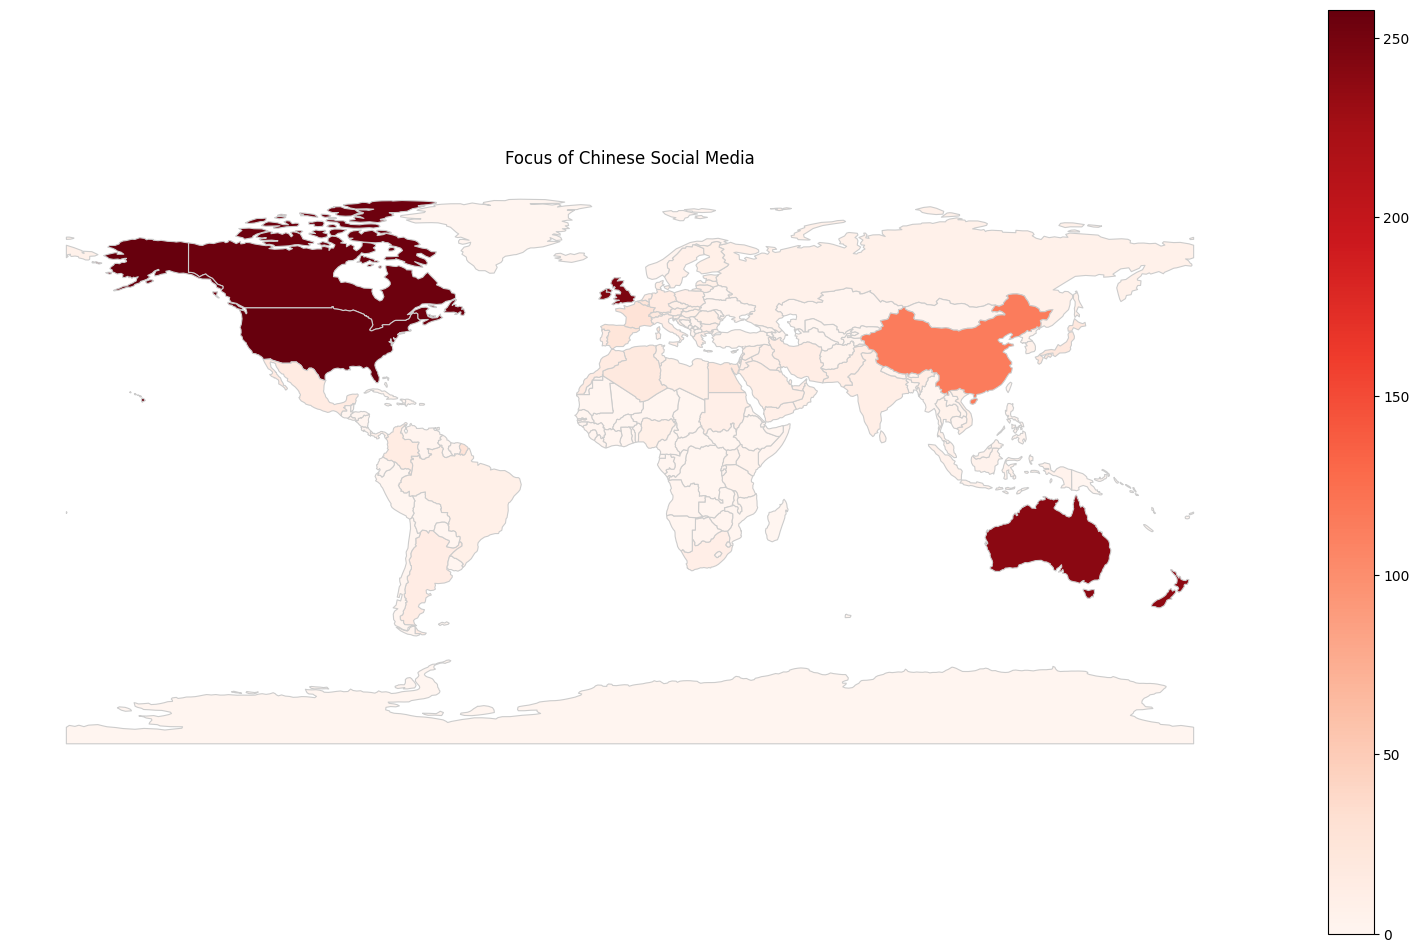

In [135]:
def map_countries_occurrences(country_count_dict):
    # Read the world shapefile data
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    # Count the occurrences of each country in the list
    # country_counts = {country: country_list.count(country) for country in set(country_list)}

    # Merge the country counts with the world shapefile data
    world['occurrences'] = world['name'].map(country_count_dict).fillna(0)
    print(len(world['occurrences'].unique()))

    # Plot the map
    fig, ax = plt.subplots(figsize=(20, 12))
    world.plot(column='occurrences', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

    # Customize the plot
    ax.set_title('Focus of Chinese Social Media')
    ax.set_axis_off()

    # Show the plot
    plt.show()
map_countries_occurrences(new_dic)

In [121]:
import pydeck as pdk

world = pdk.data.europe_ancient_world()
world

AttributeError: module 'pydeck' has no attribute 'data'

In [124]:
import streamlit as st
import pandas as pd
import pydeck as pdk
import geopandas as gpd

def visualize_country_counts(country_count_dict):
    # Convert the dictionary to a pandas DataFrame
    df = pd.DataFrame(list(country_count_dict.items()), columns=['Country', 'Count'])

    # Load the world shapefile data using geopandas
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

    # Merge the country counts with the world shapefile data
    merged_data = pd.merge(world, df, left_on='name', right_on='Country', how='left')

    # Create a deck.gl ScatterplotLayer
    layer = pdk.Layer(
        'ScatterplotLayer',
        data=merged_data,
        get_position='[longitude, latitude]',
        get_radius='Count',
        radius_scale=100000,
        get_fill_color='[255, 0, 0]',
        pickable=True
    )

    # Set the initial viewpoint for the map
    view_state = pdk.ViewState(
        latitude=0,
        longitude=0,
        zoom=1
    )

    # Create the deck.gl map
    r = pdk.Deck(
        layers=[layer],
        initial_view_state=view_state,
        tooltip={"text": "{Country}: {Count}"}
    )

    # Render the map using Streamlit
    st.pydeck_chart(r)

# Example usage
country_counts = {
    'United States': 100,
    'Canada': 50,
    'United Kingdom': 80,
    'Germany': 70,
    'France': 60
}

# Run the Streamlit app
visualize_country_counts(country_counts)

/tmp/ipykernel_644997/2829367094.py:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
2023-11-17 19:35:00.272 
  command:

    streamlit run /home/student/sinaziaee/mini_conda/miniconda3/envs/test/lib/python3.11/site-packages/ipykernel_launcher.py [ARGUMENTS]


In [32]:
print("youtube, tik tok, facebook, instagram")
len(df['YouTube account'].unique()), "  ", len(df['TikTok account'].unique()), "  ", len(df['Facebook page'].unique()), "  ", len(df['Instragram page'].unique())

youtube, tik tok, facebook, instagram


(158, '  ', 121, '  ', 325, '  ', 140)